In [1]:
import import_ipynb
import os
import cv2 as cv
os.chdir(r'D:\qk_maskrcnn_trs')

from edge_det import qk_img_predict
from edge_det import Croppng
from edge_det import edge_det
from edge_det import fit_ellipse
from hy_tools.nets_option  import create_model 


importing Jupyter notebook from D:\qk_maskrcnn_trs\edge_det\qk_img_predict.ipynb
importing Jupyter notebook from d:\qk_maskrcnn_trs\hy_tools\nets_option.ipynb


c:\Users\16477\anaconda3\envs\hy-dl\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\16477\anaconda3\envs\hy-dl\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\16477\anaconda3\envs\hy-dl\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weight

importing Jupyter notebook from D:\qk_maskrcnn_trs\edge_det\Croppng.ipynb
importing Jupyter notebook from D:\qk_maskrcnn_trs\edge_det\edge_det.ipynb
importing Jupyter notebook from D:\qk_maskrcnn_trs\edge_det\fit_ellipse.ipynb


In [4]:
img_path = r'D:\qk_maskrcnn_trs\qk_data\test_dataset\reshape-2n'
weight = r'D:\qk_maskrcnn_trs\save_weights_fpn\epoch_199.pth'
# model_fpn = get_model_instance_segmentation_resnet50_fpn(3)
model_fpn_vi = create_model(num_classes=3, model_name='mobilenet_v3_large')

In [3]:
def reshape_imgto768x1024(img_path, save_png):
    pathes = os.listdir(img_path)
    abs_path = [os.path.join(img_path, path) for path in pathes]
    num = 1
    for img in abs_path:
        target_size = (1024, 768)
        image = cv.imread(img)
        print(image.shape)
        ig = cv.resize(image, target_size)
        print('--------------------------------------------------')
        print(ig.shape)
        if save_png:
            if os.path.exists(save_png) is False:
                os.makedirs(save_png, exist_ok=True)
            png_name = img_path.split('\\')[-1] + str(num) + '.png'
            print(png_name)
            png_path = os.path.join(save_png, png_name)
            cv.imwrite(png_path, ig)
            num += 1
# reshape_imgto768x1024(img_path, r'D:\qk_maskrcnn_trs\qk_data\test_dataset\reshape-n')


In [7]:
def batch_qk_pred(img_path):
    imgs = os.listdir(img_path)
    for img in imgs:
        imgs_path1 = os.path.join(img_path, img)
        qk_img_predict.save_pred(imgs_path1, model=model_fpn_vi,
                                 iou_threshold=0, score_threshold=0.75,
                                 weights_path=weight,
                                 save_csv_path=r'D:\qk_maskrcnn_trs\edge_det\pre_csv',
                                 save_mask_png_path=r'D:\qk_maskrcnn_trs\edge_det\pre_mask')
        qk_img_predict.draw_bbox_on_image(imgs_path1,
                                          model_fpn_vi, weight, 0.5, 0.6,
                                          save_path=r'D:\qk_maskrcnn_trs\edge_det\pre_png')


batch_qk_pred(img_path=img_path)


using cuda:0 device.
inference+NMS time: 0.1086118221282959
using cuda:0 device.
inference+NMS time: 0.09085750579833984
image(D:\qk_maskrcnn_trs\edge_det\pre_png\reshape-2n_reshape-2n1_fpn.png) has been saved successed
using cuda:0 device.
inference+NMS time: 0.10940265655517578
using cuda:0 device.
inference+NMS time: 0.09675192832946777
image(D:\qk_maskrcnn_trs\edge_det\pre_png\reshape-2n_reshape-2n10_fpn.png) has been saved successed
using cuda:0 device.
inference+NMS time: 0.11544346809387207
using cuda:0 device.
inference+NMS time: 0.09692120552062988
image(D:\qk_maskrcnn_trs\edge_det\pre_png\reshape-2n_reshape-2n100_fpn.png) has been saved successed
using cuda:0 device.
inference+NMS time: 0.09723663330078125
using cuda:0 device.
inference+NMS time: 0.10212874412536621
image(D:\qk_maskrcnn_trs\edge_det\pre_png\reshape-2n_reshape-2n1000_fpn.png) has been saved successed
using cuda:0 device.
inference+NMS time: 0.08988189697265625
using cuda:0 device.
inference+NMS time: 0.0889205

In [8]:
mask_path = r'D:\qk_maskrcnn_trs\edge_det\pre_mask'
csv_path  = r'D:\qk_maskrcnn_trs\edge_det\pre_csv'
save_path = r'D:\qk_maskrcnn_trs\edge_det\crop_mask'


def batch_crop(csv_path, mask_path, save_path):  # For Instance:b9,b1.et,al
    csv_files    = os.listdir(csv_path)
    csv_cls_name = img_path.split('\\')[-1]
    for csv_file in csv_files:
        if csv_file.split('_')[0] == csv_cls_name:
            csv_f = os.path.join(csv_path, csv_file)
            Crop_Mask1 = Croppng.Crop_Mask(
                mask_path = mask_path, csv_files=csv_f)
            Crop_Mask1.read_png_csv(show_img = False)
            Crop_Mask1.Crop_Masks(save_path = save_path)


batch_crop(csv_path, mask_path, save_path)


reshape-2n_reshape-2n1000_fpn
['D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_0.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_1.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_2.jpg']
['D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_0.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_1.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_2.jpg']
reshape-2n_reshape-2n1000_fpn
['D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_0.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_1.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_2.jpg']
['D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_0.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_reshape-2n1000_fpn_1.jpg', 'D:\\qk_maskrcnn_trs\\edge_det\\pre_mask\\reshape-2n_res

reshape-2n
13046
--
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1000_fpn_0_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1000_fpn_1_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1000_fpn_2_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1001_fpn_0_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1001_fpn_1_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1001_fpn_2_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1002_fpn_0_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1002_fpn_1_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1002_fpn_2_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1003_fpn_0_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1003_fpn_1_mask.jpg
--
D:\qk_maskrcnn_trs\edge_det\crop_mask\reshape-2n_reshape-2n1004_fpn_0_mask.

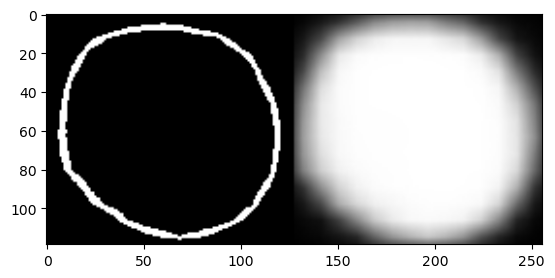

In [3]:
save_mask3d_path = r'D:\qk_maskrcnn_trs\edge_det\dege_pre'
save_edge_path = r'D:\\qk_maskrcnn_trs\edge_det\dege'
img_path_mask1 = r'D:\qk_maskrcnn_trs\edge_det\crop_mask'
def batch_edge_main(save_mask3d_path, save_edge_path):
    net = edge_det.net_hsd()
    csv_cls_name = img_path.split('\\')[-1]
    print(csv_cls_name)
    imgs = os.listdir(r'D:\qk_maskrcnn_trs\edge_det\crop_mask')
    print(imgs.__len__())
    print('--')
    for img in imgs:
        if img.split('_')[0] == csv_cls_name:
            print('--')
            mask_path = os.path.join(r'D:\qk_maskrcnn_trs\edge_det\crop_mask', img)
            print(mask_path)
            filter = edge_det.Crop2bin_img(img_path=mask_path, scale=0.2)
            filter.save_mask3d(save_path = save_mask3d_path)
            filter.con_mask_img()
    #for mask in os.listdir(save_mask3d_path):
    #    if mask.split('_')[0] == csv_cls_name:
    #        file = os.path.join(save_mask3d_path, mask)
    #        edge_det.main_det(img_path = file,net=net, 
    #        save_path = save_edge_path, is_show=False)
    #        # print('{0},{1} has been saved', format(save_path, file))


batch_edge_main(save_mask3d_path, save_edge_path)

(173, 200, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 200 x 173
Padded image size: 204 x 177
(173, 200, 3)
1
[[[-1 -1 -1 -1]]]
(188, 166, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 166 x 188
Padded image size: 170 x 192
(188, 166, 3)
1
[[[-1 -1 -1 -1]]]
(147, 206, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 206 x 147
Padded image size: 210 x 151
(147, 206, 3)
1
[[[-1 -1 -1 -1]]]
(167, 179, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 179 x 167
Padded image size: 183 x 171
(167, 179, 3)
1
[[[-1 -1 -1 -1]]]
(184, 182, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 182 x 184
Padded image size: 186 x 188
(184, 182, 3)
1
[[[-1 -1 -1 -1]]]
(203, 144, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 144 x 203
Padded image size: 148 x 207
(203, 144, 3)
1
[[[-1 -1 -1 -1]]]
(151, 178, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 178 x 151
Padded image size: 182 x 155
(151, 178, 3)
1
[[[-1 -1 -1 -1]]]
(128, 179, 3)
1
[[[-1 -1 -1 -1]]]
Original image size: 179 x 128
Padded image size: 183 x 132
(128, 179,

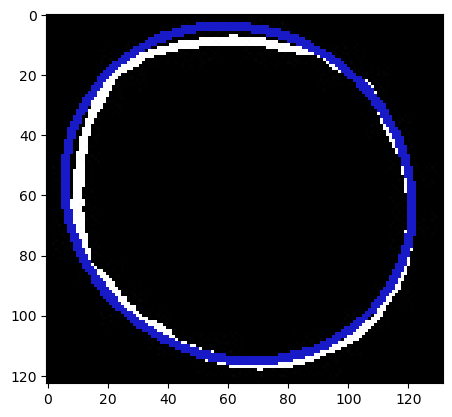

In [5]:
def main_fit(mask_edge_path):
    edges = os.listdir(mask_edge_path)
    for edge in edges:
        csv_cls_name = img_path.split('\\')[-1]
        if edge.split('_')[0] == csv_cls_name:
            edges_files = os.path.join(mask_edge_path, edge)
            if cv.imread(edges_files).max() != 0:
                e = fit_ellipse.fit_draw_ellipse(edge_img = edges_files)
                # e.draw_ellipse()
                e(save_path=r'D:\qk_maskrcnn_trs\edge_det\fit_ellipes')
                e.save_ell_para(save_path=r'D:\qk_maskrcnn_trs\edge_det\fit_ell_csv')
main_fit(mask_edge_path = r'D:\qk_maskrcnn_trs\edge_det\dege_pre')